In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/twitter_training.csv", header=None)
df.columns = ["ID", "Game", "Sentiment", "Tweet"]


In [3]:
df.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Tweet'], dtype='object')

In [5]:
# Drop the specified columns
df.drop(columns=["ID", "Game"], inplace=True)

# Verify the remaining columns
print("Remaining column names:", df.columns)
print(df.head())


Remaining column names: Index(['Sentiment', 'Tweet'], dtype='object')
  Sentiment                                              Tweet
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  I am coming to the borders and I will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...


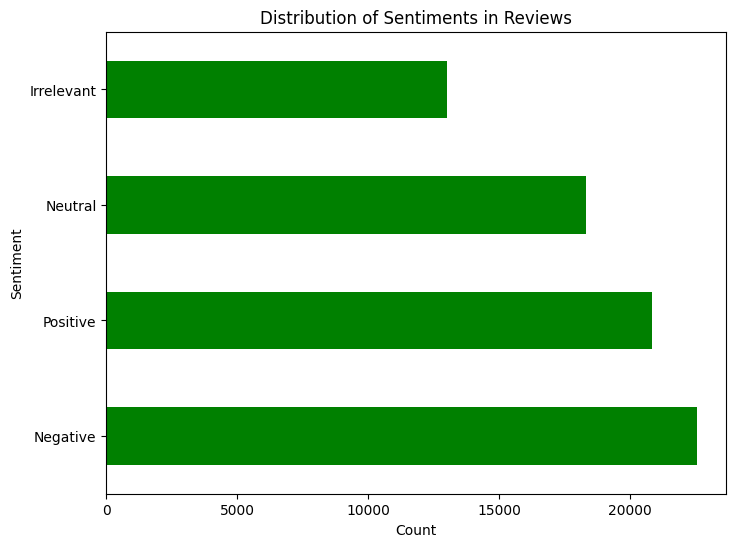

In [6]:
plt.figure(figsize=(8, 6))
df["Sentiment"].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Distribution of Sentiments in Reviews")
plt.show()

In [7]:
df.head()

,Sentiment,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [9]:
# Define the mapping
sentiment_mapping = {
    'Positive': 'Positive',
    'Negative': 'Negative',
    'Neutral': 'Neutral'
}

# Apply the mapping
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Drop any rows with NaN values that may have been introduced by mapping
df.dropna(subset=['Sentiment'], inplace=True)

# Check the unique sentiment values again
print("Unique sentiment values after mapping:", df['Sentiment'].unique())

Unique sentiment values after mapping: ['Positive' 'Neutral' 'Negative']


### We can see that it is equally split so no need for SMOTE

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Check the unique values after encoding
print("Encoded sentiment values:", df['Sentiment'].unique())


Encoded sentiment values: [2 1 0]


In [12]:
df.head()

,Sentiment,Tweet
0,2,im getting on borderlands and i will murder yo...
1,2,I am coming to the borders and I will kill you...
2,2,im getting on borderlands and i will kill you ...
3,2,im coming on borderlands and i will murder you...
4,2,im getting on borderlands 2 and i will murder ...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical
df.dropna(subset=['Tweet'], inplace=True)
# Vectorize the tweets using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Target labels
y = df['Sentiment']
y = to_categorical(y, num_classes=3)  # One-hot encoding

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define the neural network model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.6293 - loss: 0.8049 - val_accuracy: 0.8166 - val_loss: 0.4649
Epoch 2/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.8794 - loss: 0.3201 - val_accuracy: 0.8881 - val_loss: 0.2911
Epoch 3/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9431 - loss: 0.1528 - val_accuracy: 0.9098 - val_loss: 0.2501
Epoch 4/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9579 - loss: 0.1010 - val_accuracy: 0.9103 - val_loss: 0.2447
Epoch 5/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9646 - loss: 0.0806 - val_accuracy: 0.9141 - val_loss: 0.2567
Epoch 6/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.9676 - loss: 0.0732 - val_accuracy: 0.9171 - val_loss: 0.2524
Epoch 7/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.9672 - loss: 0.0699 - val_accuracy: 0.9178 - val_loss: 0.2607
Epoch 8/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9710 -

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9224 - loss: 0.2747
Accuracy: 0.9231083989143372


In [17]:
# Example predictions
predictions = model.predict(X_test)
print("Predictions:\n", predictions)

383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Predictions:
 [[7.9360707e-06 9.9999017e-01 1.7793950e-06]
 [1.5109518e-02 9.7863984e-01 6.2507098e-03]
 [9.9999994e-01 3.8953435e-10 4.0478960e-11]
 ...
 [9.9999982e-01 1.6514004e-10 1.4480412e-07]
 [3.5853439e-04 9.9961859e-01 2.2848710e-05]
 [9.9249673e-01 4.4466932e-03 3.0565481e-03]]


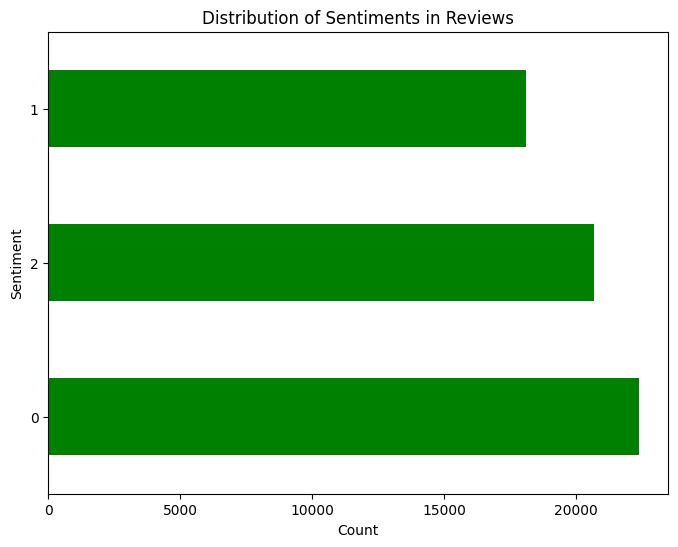

In [18]:
import matplotlib.pyplot as plt

# Plot Sentiment Distribution
plt.figure(figsize=(8, 6))
df["Sentiment"].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Distribution of Sentiments in Reviews")
plt.show()

In [20]:
newdf = pd.read_csv("/content/twitter_validation.csv", header=None)
newdf.columns = ["ID", "Game", "Sentiment", "Tweet"]
newdf.head()

,ID,Game,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [21]:
newdf.drop(columns=["ID", "Game"], inplace=True)

# Verify the remaining columns
print("Remaining column names:", df.columns)
print(newdf.head())


Remaining column names: Index(['Sentiment', 'Tweet'], dtype='object')
    Sentiment                                              Tweet
0  Irrelevant  I mentioned on Facebook that I was struggling ...
1     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2    Negative  @Microsoft Why do I pay for WORD when it funct...
3    Negative  CSGO matchmaking is so full of closet hacking,...
4     Neutral  Now the President is slapping Americans in the...


In [22]:
# Define the mapping
sentiment_mapping = {
    'Positive': 'Positive',
    'Negative': 'Negative',
    'Neutral': 'Neutral'
}

# Apply the mapping
newdf['Sentiment'] = newdf['Sentiment'].map(sentiment_mapping)

# Drop any rows with NaN values that may have been introduced by mapping
newdf.dropna(subset=['Sentiment'], inplace=True)

# Check the unique sentiment values again
print("Unique sentiment values after mapping:", newdf['Sentiment'].unique())

Unique sentiment values after mapping: ['Neutral' 'Negative' 'Positive']


In [23]:
newdf['Sentiment'] = label_encoder.fit_transform(newdf['Sentiment'])


In [24]:
newdf.dropna(subset=['Tweet'], inplace=True)
X = tfidf_vectorizer.fit_transform(newdf['Tweet']).toarray()
# Target labels
y = newdf['Sentiment']
y = to_categorical(y, num_classes=3)  # One-hot encoding

In [25]:
print("Shape of X:", X.shape)

Shape of X: (828, 4654)
